In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/loans-d/Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Distribution of age and Experience across the data

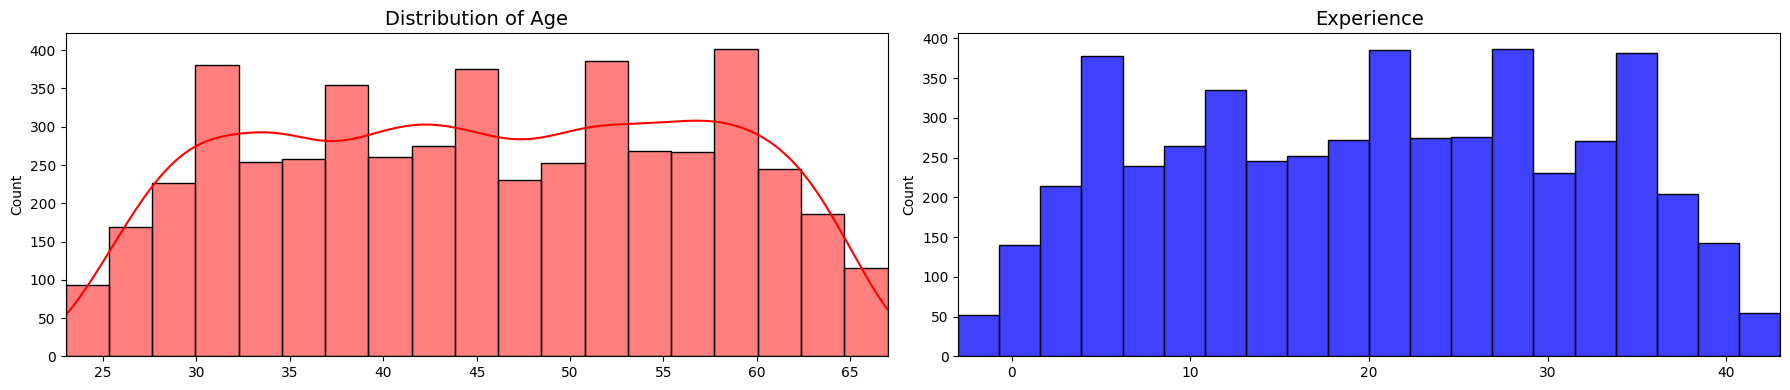

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# First plot: Distribution of Age
Age_val = df['Age'].values
sns.histplot(Age_val, color='r', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Age', fontsize=14)
ax[0].set_xlim([min(Age_val), max(Age_val)])

Exp_val = df['Experience'].values
sns.histplot(Exp_val, color='b', kde=False, ax=ax[1])
ax[1].set_title('Experience', fontsize=14)
ax[1].set_xlim([min(Exp_val), max(Exp_val)])

plt.tight_layout()
plt.show()

## Count of Family members

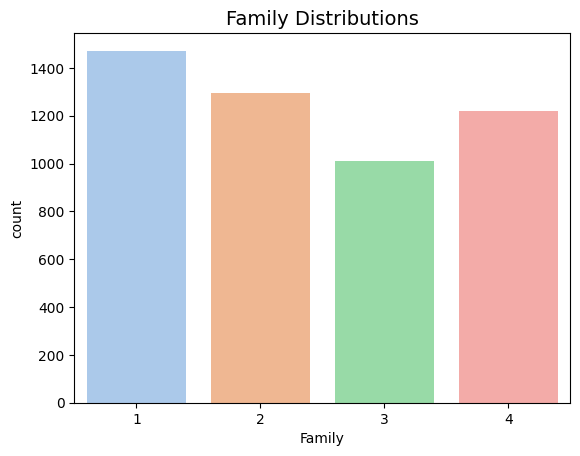

In [8]:
sns.countplot(x='Family', data=df, palette="pastel")
plt.title('Family Distributions', fontsize=14)
plt.show()

## Acceptance of Loans relation with Income

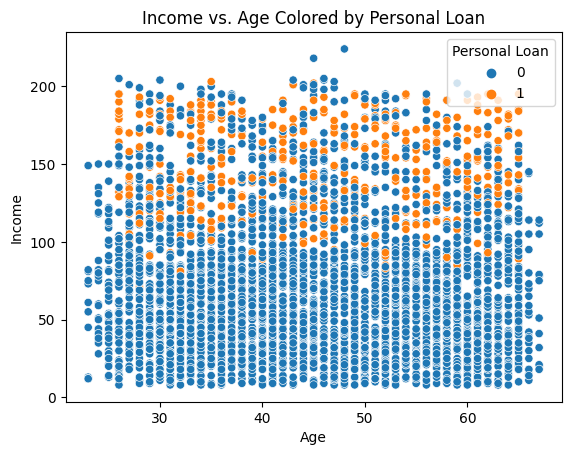

In [9]:
sns.scatterplot(data=df, x='Age', y='Income', hue='Personal Loan')
plt.title('Income vs. Age Colored by Personal Loan')
plt.show()

## Relation between Income and other columns

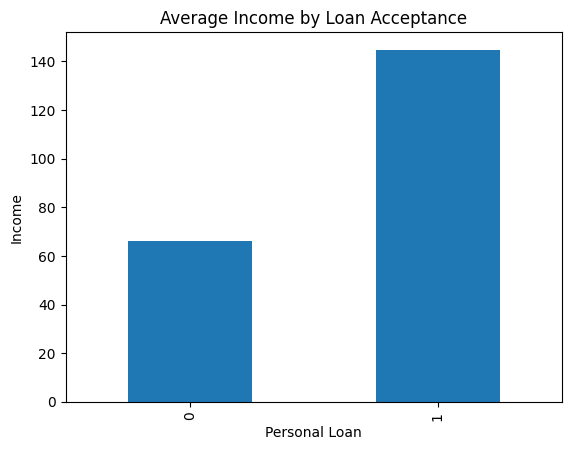

In [10]:
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')
plt.title('Average Income by Loan Acceptance')
plt.ylabel('Income')
plt.show()

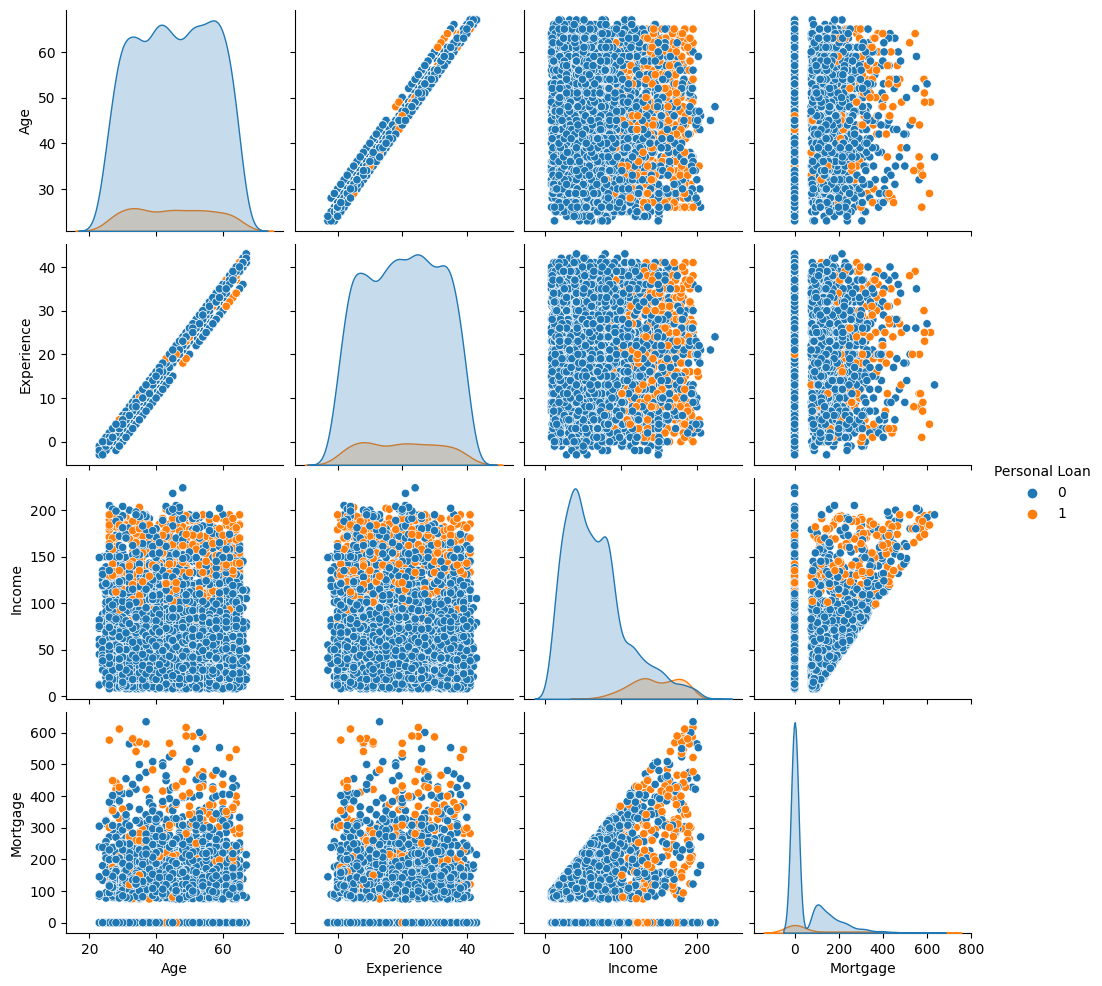

In [11]:
sns.pairplot(df, vars=['Age', 'Experience', 'Income', 'Mortgage'], hue='Personal Loan')
plt.show()

## Percentage of Online banking usage

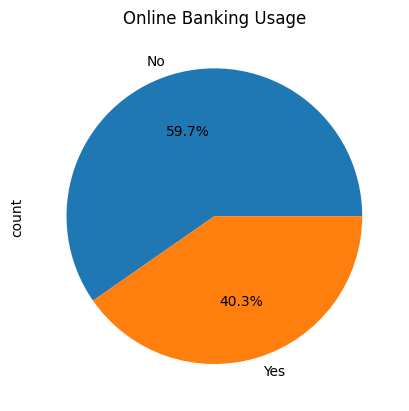

In [12]:
df['Online'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Online Banking Usage')
plt.show()

## Likelyhood of having a card

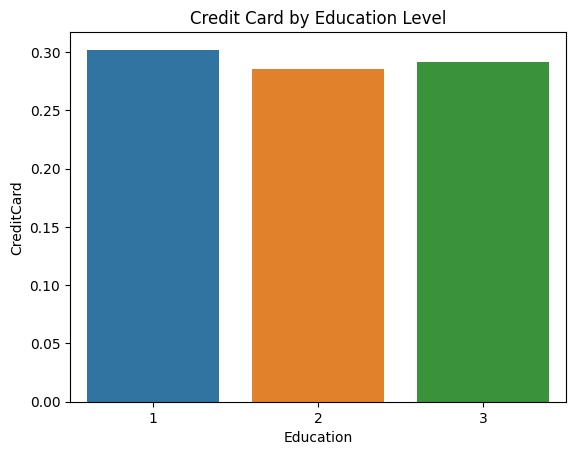

In [13]:
sns.barplot(data=df, x='Education', y='CreditCard', ci=None)
plt.title('Credit Card by Education Level')
plt.show()

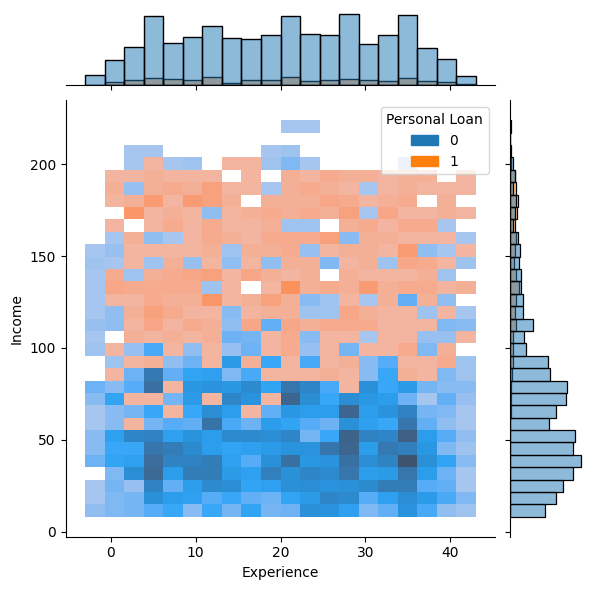

In [14]:
sns.jointplot(x="Experience", y="Income",data=df,kind="hist",hue='Personal Loan')

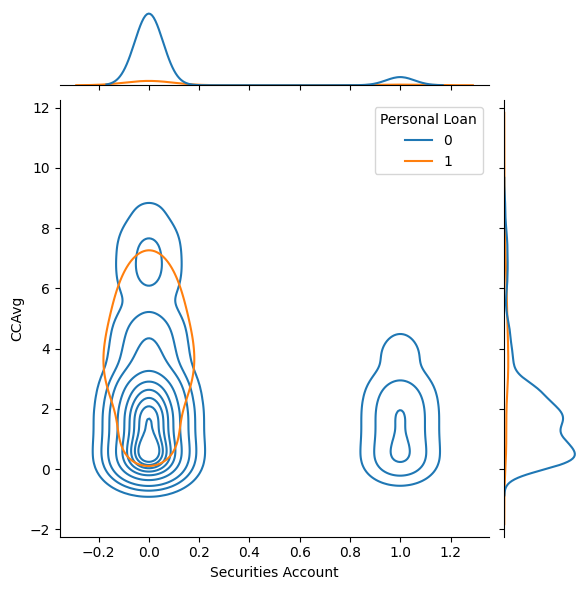

In [15]:
sns.jointplot(x="Securities Account",y="CCAvg",data=df,kind="kde",hue='Personal Loan')

## Correlation heatmap 

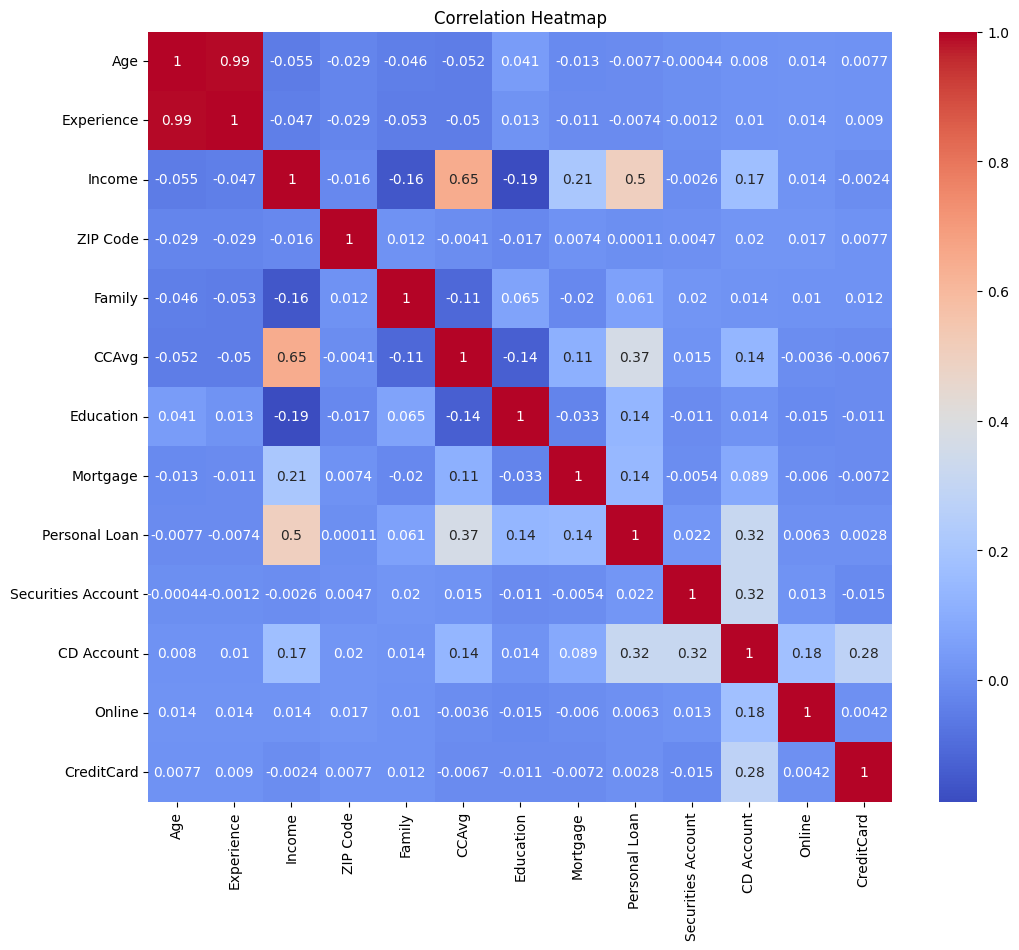

In [16]:
df_corr = df.drop(["ID"], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# IQR

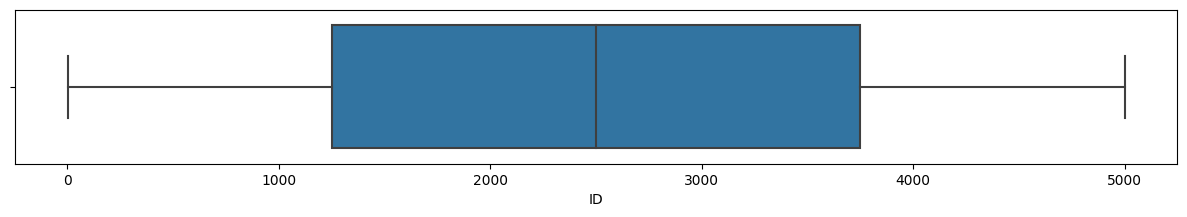

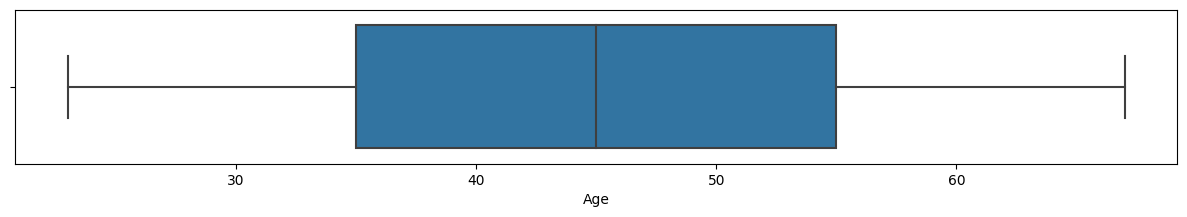

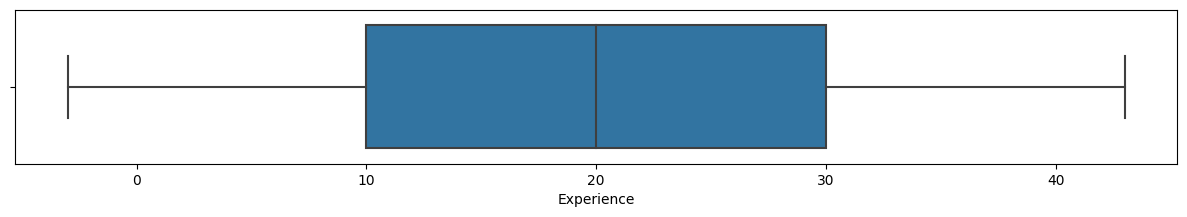

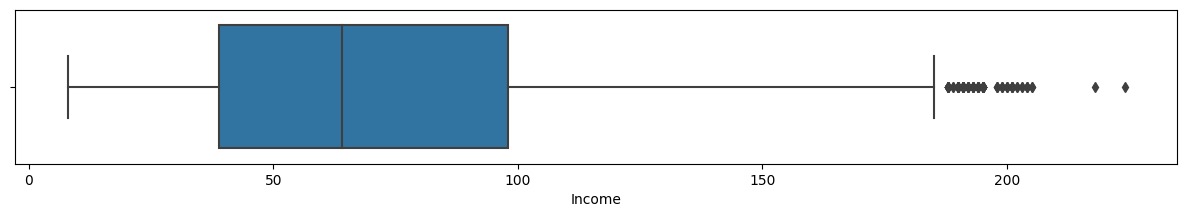

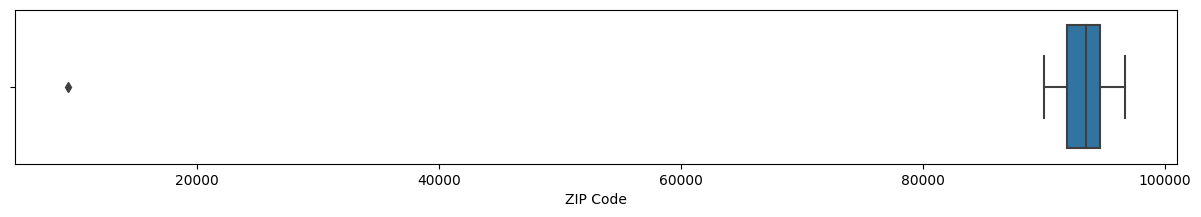

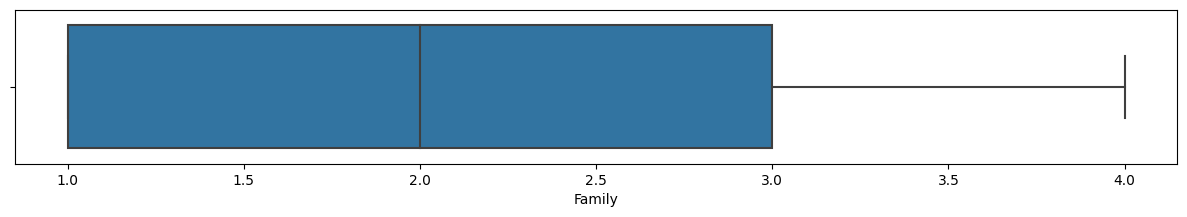

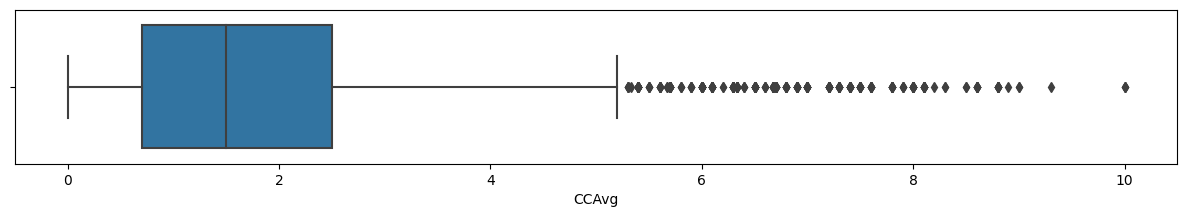

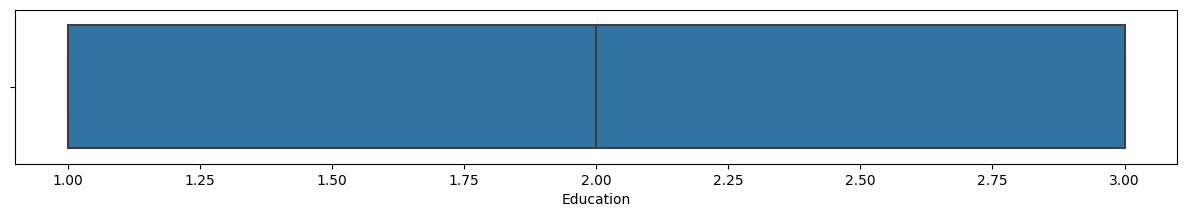

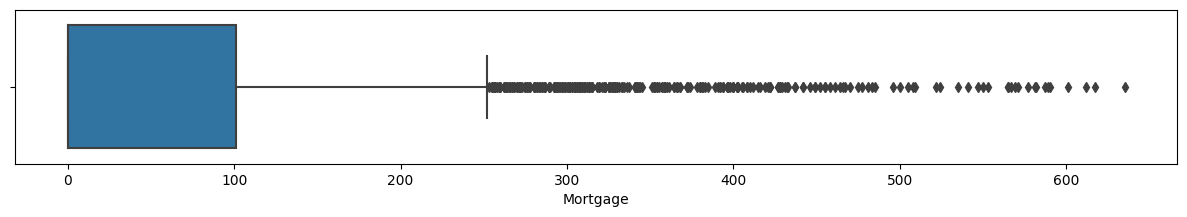

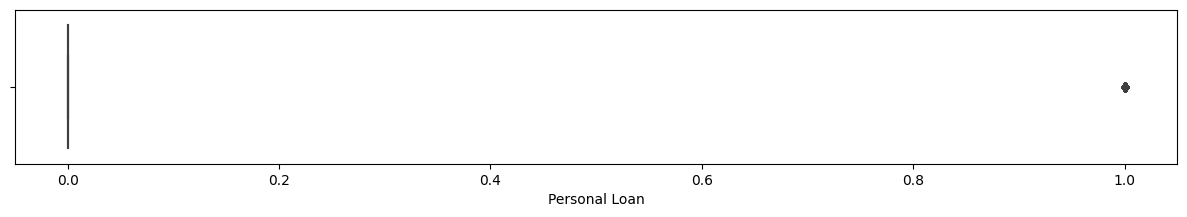

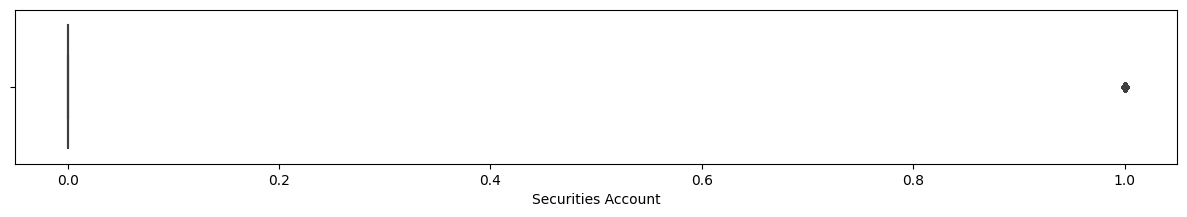

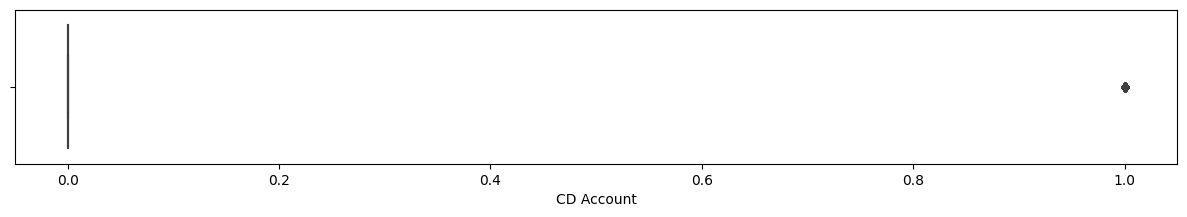

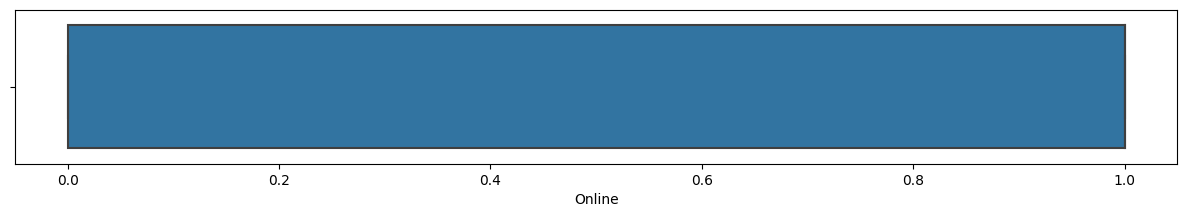

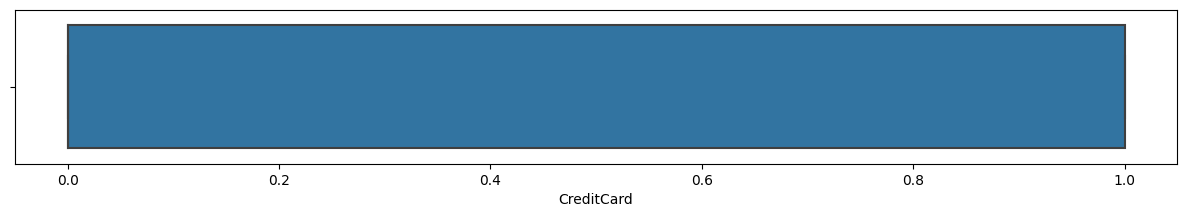

In [17]:
for column in df:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column])

In [32]:
def replace_outliers_with_fences(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    df[col_name] = np.where(df[col_name] < fence_low, fence_low, df[col_name])
    df[col_name] = np.where(df[col_name] > fence_high, fence_high, df[col_name])
    return df

In [33]:
replace_outliers_with_fences(df, "ZIP Code")
replace_outliers_with_fences(df, "Income")
replace_outliers_with_fences(df, "CCAvg")
replace_outliers_with_fences(df, "Mortgage")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,0.01,49.0,91107.0,4,0.055556,1,0.0,0,1,0,0,0
1,2,45,0.19,34.0,90089.0,3,0.000000,1,0.0,0,1,0,0,0
2,3,39,0.15,11.0,94720.0,1,-0.277778,1,0.0,0,0,0,0,0
3,4,35,0.09,100.0,94112.0,1,0.666667,2,0.0,0,0,0,0,0
4,5,35,0.08,45.0,91330.0,4,-0.277778,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,0.03,40.0,92697.0,1,0.222222,3,0.0,0,0,0,1,0
4996,4997,30,0.04,15.0,92037.0,4,-0.611111,1,85.0,0,0,0,1,0
4997,4998,63,0.39,24.0,93023.0,2,-0.666667,3,0.0,0,0,0,0,0
4998,4999,65,0.40,49.0,90034.0,3,-0.555556,2,0.0,0,0,0,1,0


# Decimal Scaling

In [20]:
max_abs_value = np.max(np.abs(df['Experience']))
scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))

In [21]:
df['Experience'] = df['Experience'] / scaling_factor

# Robust Scaling

In [22]:
scaler = RobustScaler()

In [23]:
df['CCAvg'] = scaler.fit_transform(df[['CCAvg']])

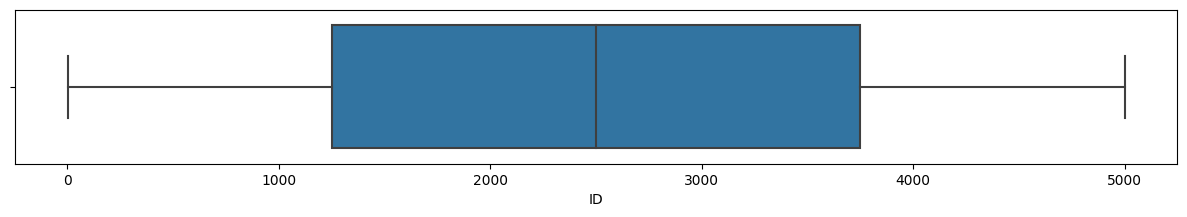

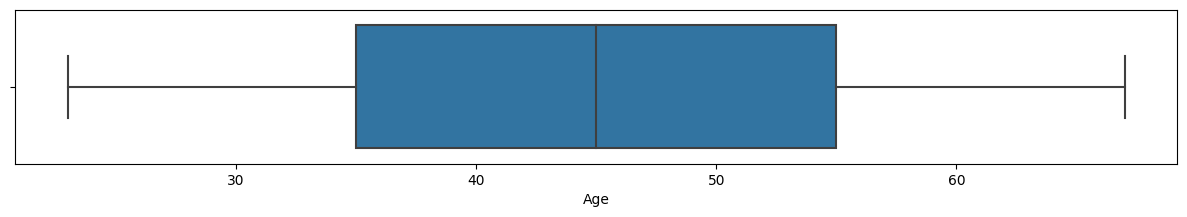

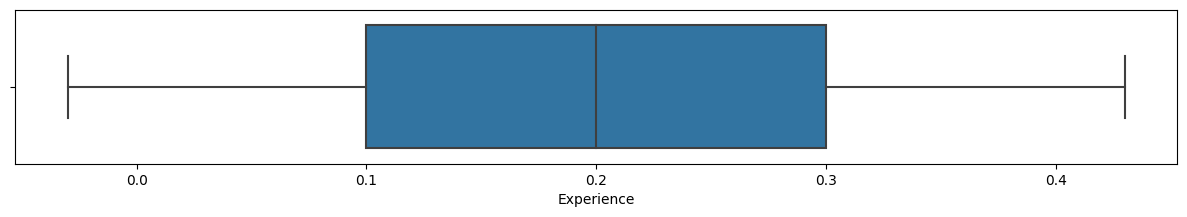

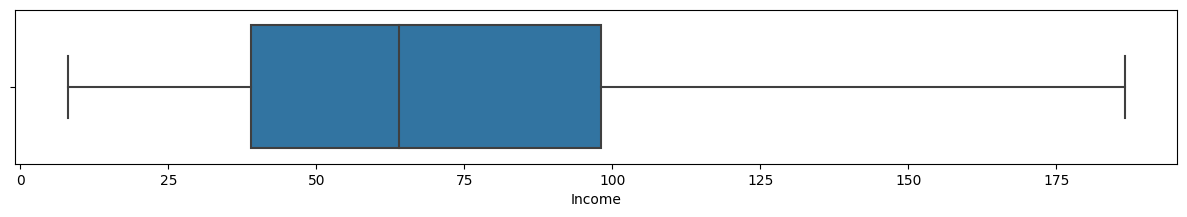

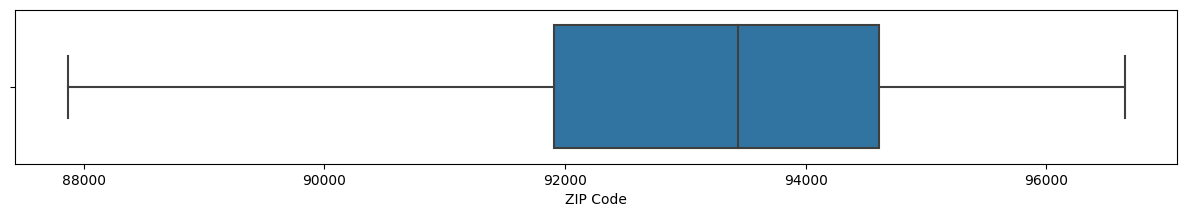

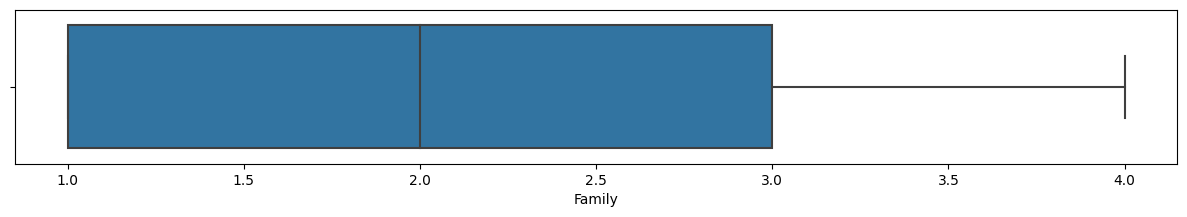

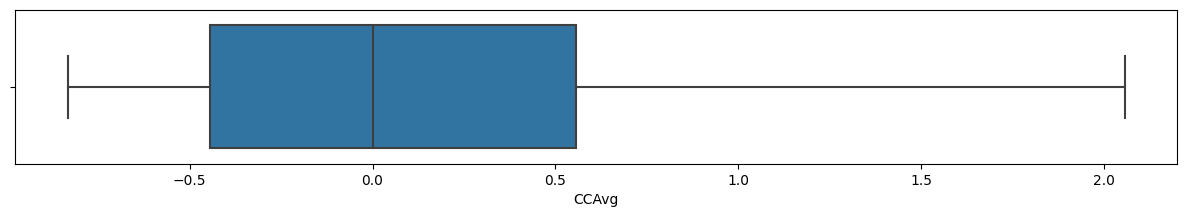

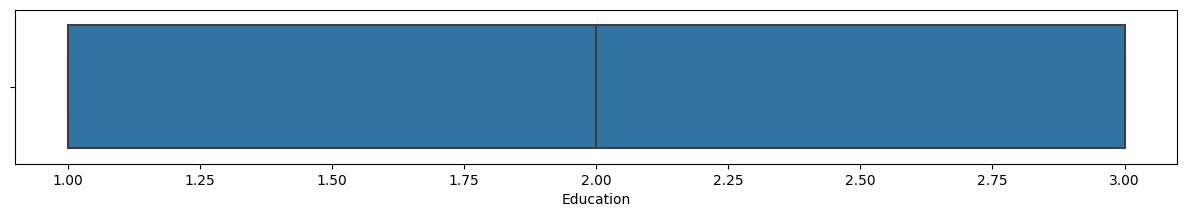

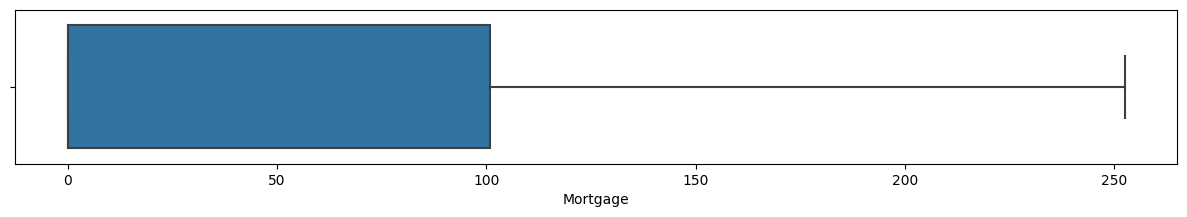

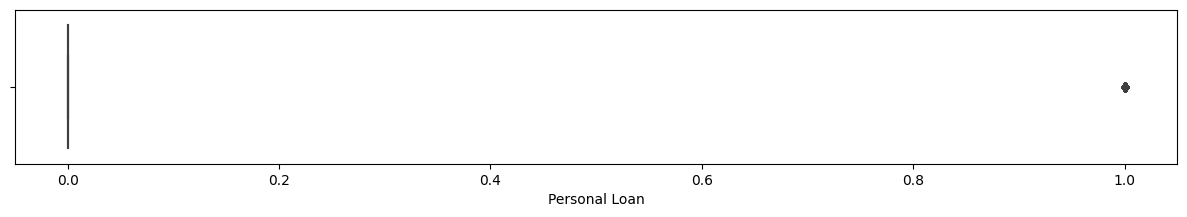

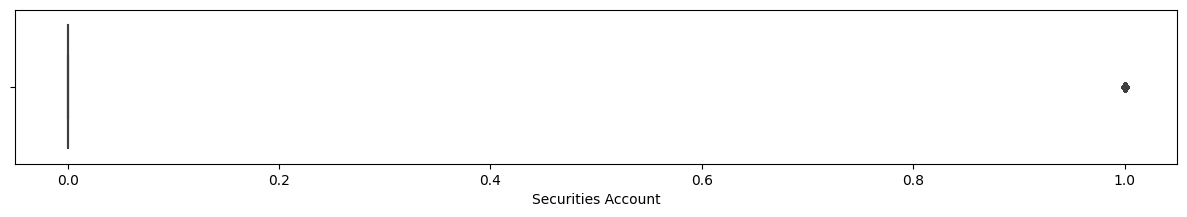

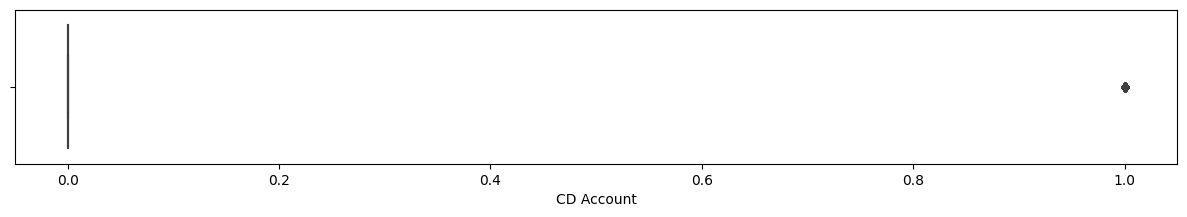

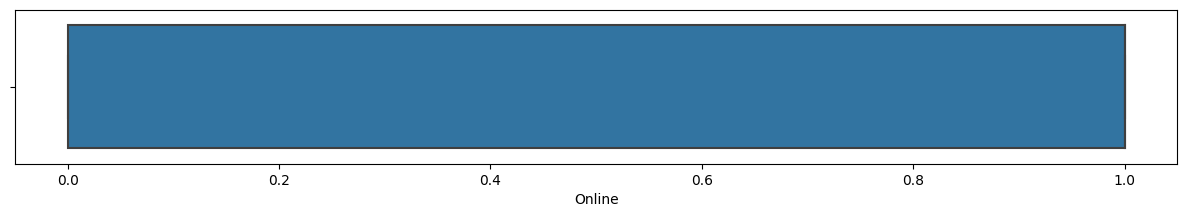

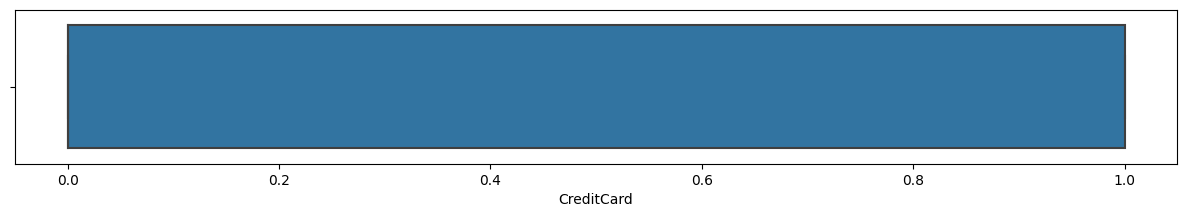

In [34]:
for column in df:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column])

## Split

In [25]:
X = df.drop(['CCAvg', 'ID'], axis=1)
y = df['CCAvg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Model

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

0.36622668480544096

In [29]:
r2_score(y_test, y_pred)

0.4436232397278942

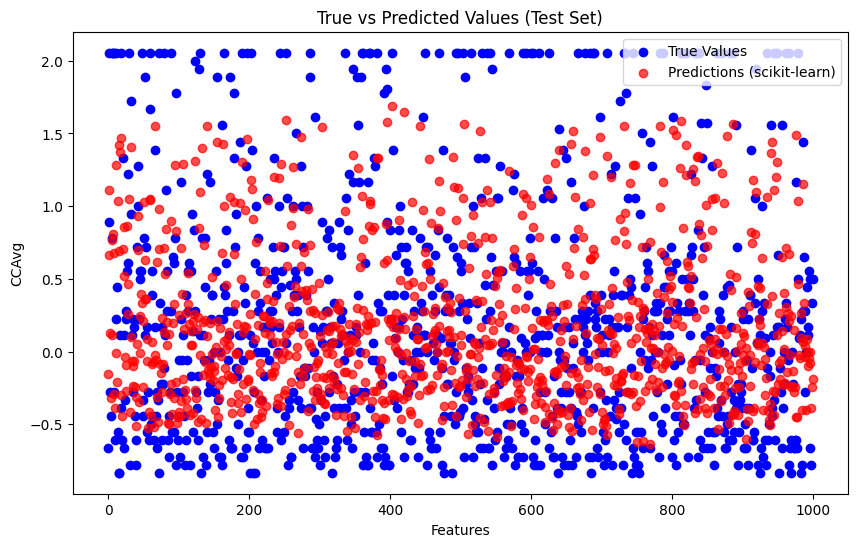

In [30]:
# Visualization of Predictions vs True Values for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label="True Values")
plt.scatter(range(len(y_test)), y_pred, color='red', label="Predictions (scikit-learn)", alpha=0.7)
plt.xlabel("Features")
plt.ylabel("CCAvg")
plt.legend()
plt.title("True vs Predicted Values (Test Set)")
plt.show()